In [15]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *


from qiskit import QuantumCircuit

from qiskit.quantum_info.operators.predicates import is_isometry
import numpy as np
from scipy.linalg import hadamard
from sympy import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()
import numpy as np
from numpy import pi
import cmath 



ibmqfactory.load_account:WARNING:2020-06-17 14:46:36,533: Credentials are already in use. The existing account in the session will be replaced.


# The utility Graph
Taken a budget of 4 with item cost 2 and 1 giving satisfaction of 4 and 3.

Yoy can change the hameltone "H"and then the corrosponding Exp[-i gamma H] in the circuit to get your desired function.

You can see the Hamaltone defining done in a seperate file in the repository.

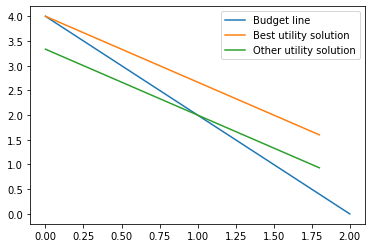

In [16]:
B = 4 #Budget taken as C0 in Mathematica calculation
Ca , Cb = 2,1 #Ca is cost of first unit Cb is cost of the 2nd
Ha , Hb = 4,3 #Ha is Happines of first unit Hb is hapiness of the 2nd

import matplotlib.pyplot as plt 
x = [0,1,2]
y = [4,2,0]

x1 = np.arange(0,2,0.3)
y1 = []
y2 = []
for i in range (len(x1)):
    y1.append((12-Ha*x1[i])/Hb)
    y2.append((10-Ha*x1[i])/Hb)

plt.plot(x, y,label='Budget line')
plt.plot(x1,y1,label='Best utility solution ')
plt.plot(x1,y2,label='Other utility solution')
plt.legend()

# One Iteratition 
This circuit is for one Gamma and Beta.


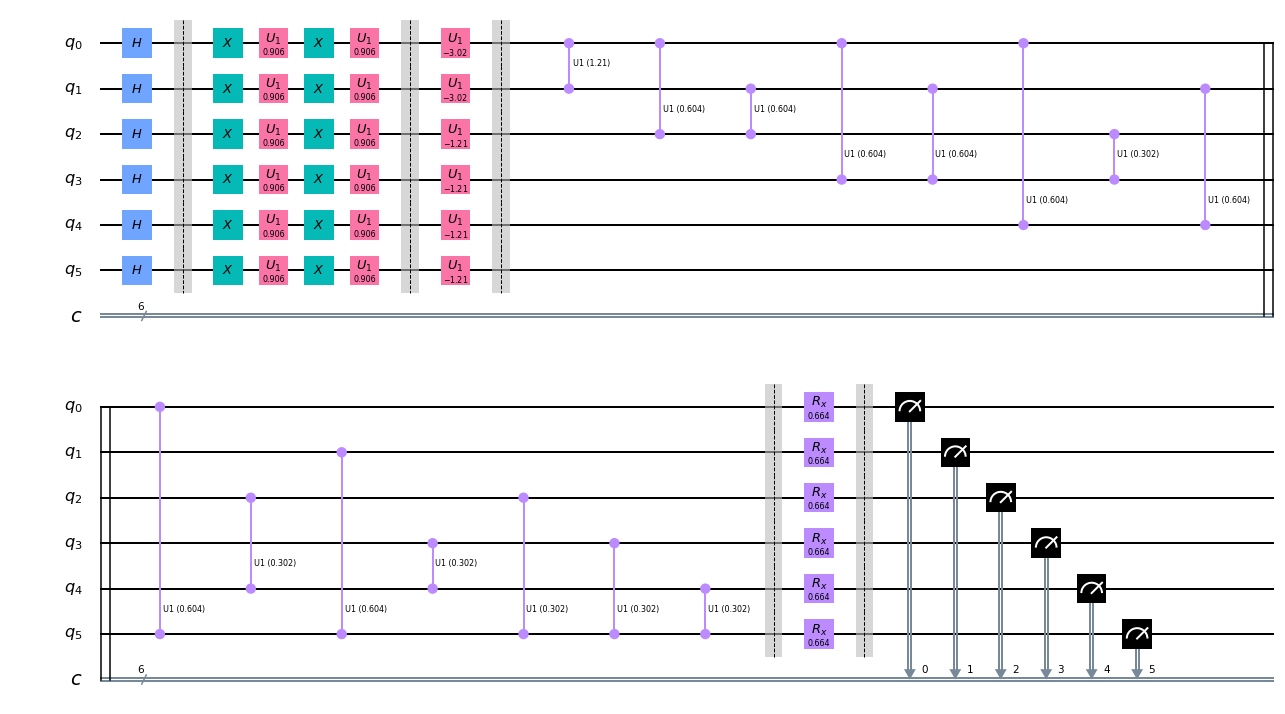

In [47]:
l = int(B/Ca + B/Cb )# total no of element we will be working on
gamma = 0.150991; beta= 0.332161
qc = QuantumCircuit(l, l)
qc.h(range(l))
qc.barrier()
for i in range (l):    
    qc.x(i)
    qc.u1(4*gamma*(((B^2))), i)
    qc.x(i)
    qc.u1(4*gamma*((B^2)), i)

qc.barrier()
H = [Ha,Ha,Hb,Hb,Hb,Hb]
C = [Ca,Ca,Cb,Cb,Cb,Cb]
for i in range (l):
    qc.u1(-gamma*(H[i]+8*C[i]*B-4*(C[i]^2)),i)
qc.barrier()
for i in range(l):
    for j in range(l):
        if i>j:
            qc.cu1(8*gamma*C[i]*C[j],i,j)

qc.barrier()
qc.rx(2*beta, range(l))
qc.barrier()
qc.measure(range(l),range(l))
qc.draw(output='mpl')


# Two Iteration
we have 2 Gamma and Beta here.
Note: These are not optemized one, given values are more like dummey Gamma and Beta.

You can claculate it using provided Mathematica codes. 

In [ ]:
#l = int(B/Ca + B/Cb )# total no of element we will be working on
#gamma = [0.150991,0.0850137]; beta1= [0.332161,0.287645]
#qc = QuantumCircuit(l, l)
#qc.h(range(l))
#qc.barrier()
#for k in range (len(gamma)):
#    for i in range (l):    
#        qc.x(i)
#        qc.u1(gamma[k]*(((B^2))), i)
#        qc.x(i)
#        qc.u1(gamma[k]*((B^2)), i)

#    qc.barrier()
#    H = [Ha,Ha,Hb,Hb,Hb,Hb]
#    C = [Ca,Ca,Cb,Cb,Cb,Cb]
#    for i in range (l):
#        qc.u1(-gamma[k]*(H[i]+2*C[i]*B-1*(C[i]^2)),i)
#    qc.barrier()
#    for i in range(l):
#        for j in range(l):
#            if i>j:
#                qc.cu1(2*gamma[k]*C[i]*C[j],i,j)

#    qc.barrier()
#    qc.rx(2*beta[k], range(l))
#    qc.barrier()
#qc.measure(range(l),range(l))
#qc.draw(output='mpl')


# Solution
State with the maximum probability is supposed to be the solution.

Note: only 1 iteration won't be giving the best result try using 2 or more 

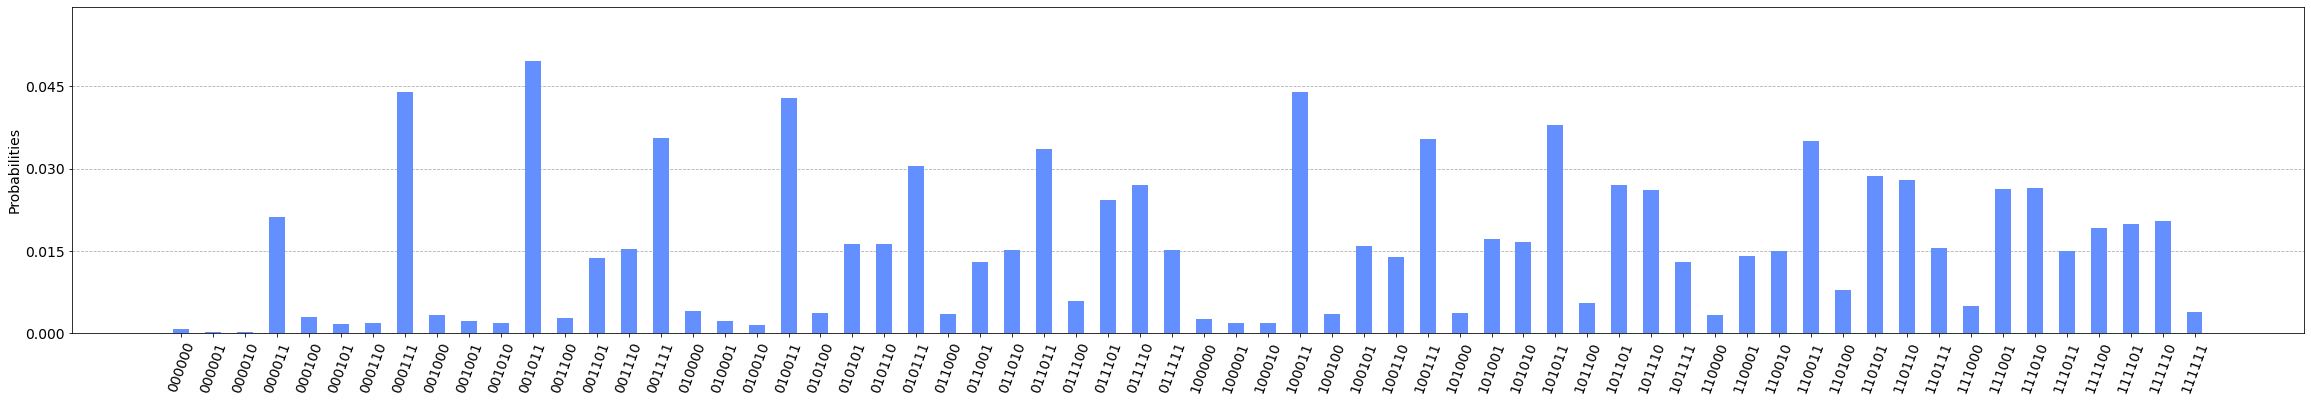

In [48]:
backend      = Aer.get_backend("qasm_simulator")
shots        = 10000

simulate     = execute(qc, backend=backend, shots=shots)
qc_results = simulate.result()

plot_histogram(qc_results.get_counts(),figsize = (40,6),bar_labels = False)